<a href="https://colab.research.google.com/github/fanbyprinciple/kaggle_kernels/blob/master/beginners_intro_to_activeloopai_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INSTALLING

In [1]:
!pip3 install hub

### IMPORTING

In [2]:
import hub
ds = hub.load('hub://activeloop/cifar10-train')

Opening dataset in read-only mode as you don't have write permissions.
hub://activeloop/cifar10-train loaded successfully.


In [4]:
print(list(ds.tensors.keys()))

['images', 'labels']


In [5]:
print(ds.images.shape)

(50000, 32, 32, 3)


In [6]:
print(ds.labels.shape)

(50000, 1)


### CREATING A CNN NETWORK

In [7]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim


In [8]:

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x =  torch.transpose(x, 1, 3)
    x = x/ 255.
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x 


In [9]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

### TRAINING

In [12]:
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(ds.pytorch(num_workers=0, batch_size=4, shuffle=True)):
    images, labels = data
    optimizer.zero_grad()

    outputs = net(images)
    loss = criterion(outputs, labels.reshape(-1))
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

[1,  2000] loss: 2.293
[1,  4000] loss: 2.078
[1,  6000] loss: 1.939
[1,  8000] loss: 1.830
[1, 10000] loss: 1.729
[1, 12000] loss: 1.652
[2,  2000] loss: 1.590
[2,  4000] loss: 1.569
[2,  6000] loss: 1.523
[2,  8000] loss: 1.506
[2, 10000] loss: 1.494
[2, 12000] loss: 1.478


### EXPLORING DATABASE

In [19]:
for i,data in enumerate(ds.pytorch(num_workers=0, batch_size=1, shuffle=True)):
    images, labels = data
    break

In [23]:
labels

tensor([[6]])

In [25]:
images, len(images)

(tensor([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
 
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
 
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
 
          ...,
 
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
 
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
 
          [[177, 144, 116],
           [168, 129

### TESTING

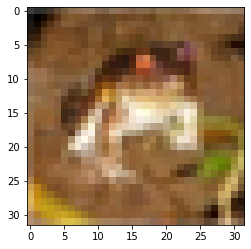

In [31]:
import matplotlib.pyplot as plt

plt.imshow(images.squeeze())

In [32]:
cifar_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [33]:
cifar_classes[labels]

'frog'

### TESTING THE PREDICTION OF THE SAME IMAGE FROM OUR MODEL

In [37]:
cifar_classes[net(images).argmax()]

'frog'

So it works.